# **PROJECT:** playstore_app_analysis

**Project Type** - EDA (Exploratory Data Analysis)

**Contribution** - Individual

## **PROJECT SUMMARY:**

This project aims to explore Google Play Store data to uncover actionable insights for app developers, focusing on user engagement, satisfaction, and app success. By leveraging Exploratory Data Analysis (EDA), the study examines attributes like app category, ratings, and user reviews to identify patterns and trends. The goal is to help developers optimize their apps, improve user experiences, and make data-driven decisions. Key challenges include handling missing data and outliers, with visualizations playing a critical role in presenting findings. Ultimately, this analysis will provide valuable insights to guide developers in a highly competitive marketplace.

## **GITHUB LINK:**

Link: https://github.com/kush-agra-soni/play_store_eda.git

## **PROBLEM STATEMENT**


The Playstore App Review Analysis project aims to uncover key factors that drive app success on the Google Play Store by conducting an in-depth Exploratory Data Analysis (EDA). The project will analyze various attributes such as app ratings, categories, user reviews, and pricing models to identify patterns, correlations, and trends. The goal is to derive actionable insights that can help developers optimize their apps, improve user satisfaction, and make informed decisions to enhance app performance in a competitive marketplace.

#### **Define Your Business Objective?**

*Optimizing App Success Rate*

## **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# **BEGINING:**

## ***1. KNOW YOUR DATA***

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
import missingno as msno
from sklearn.preprocessing import StandardScaler
from scipy import stats
import plotly.express as px
import plotly.io as pio
import gdown

### Dataset Loading

In [2]:
import pandas as pd

# GitHub raw URLs for your datasets
base_url = "https://raw.githubusercontent.com/kush-agra-soni/3_play_store_eda/refs/heads/main/"
user_reviews_url = f"{base_url}user_reviews.csv"
playstore_data_url = f"{base_url}play_store_data.csv"

# Load the CSV files into DataFrames
user_data = pd.read_csv(user_reviews_url)
play_data = pd.read_csv(playstore_data_url)

### Dataset First View

In [3]:
play_data.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [4]:
user_data.head(3)

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN


### Dataset Rows & Columns count

In [5]:
print('PlayStore =' , play_data.shape)
print('User Reviews =', user_data.shape)

PlayStore = (10841, 13)
User Reviews = (64295, 5)


### Dataset Information

In [9]:
print(play_data.info())
print()
print(user_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtyp

#### Duplicate Values

In [10]:
# Dataset Duplicate Value Count
print('PlayStore Duplicates =', len(play_data[play_data.duplicated()]))
print('User Reviews Duplicates =', len(user_data[user_data.duplicated()]))

PlayStore Duplicates = 483
User Reviews Duplicates = 33616


#### Missing Values/Null Values

In [11]:
# Missing Values/Null Values Count
print('PlayStore Missing Values =\n',play_data.isnull().sum())
print()
print('User Reviews Missing Values =\n',user_data.isnull().sum())

PlayStore Missing Values =
 App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

User Reviews Missing Values =
 App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64


### What did you know about your dataset?

**<u>PLAYSTORE :</u>**
  The dataset, comprising **10,841** entries across **13** columns, is central to our project focused on analyzing app details from the Google Play Store. ```Key columns include App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver and Android Ver.``` This data offers insights into various aspects of apps, such as their names, categories, user ratings, review counts, sizes, and install figures. The Rating column has significant missing values **(1,474)**, while Type, Content Rating, Current Ver, and Android Ver also have a few missing values.

---

 **<u>USER REVIEWS :</u>**
 The dataset contains **64,295** entries across **5** columns, focusing on user reviews for various apps available on the Google Play Store.``` The key columns include App, Translated_Review, Sentiment, Sentiment_Polarity, and Sentiment_Subjectivity.``` This dataset is crucial for understanding user feedback, sentiment, and overall user satisfaction with different apps. However, it has significant missing values: Translated_Review (26,868), and Sentiment, Sentiment_Polarity, Sentiment_Subjectivity.

## ***2. UNDERSTANDING YOUR VARIABLES***

PLAYSTORE VARIABLES:

In [12]:
# Dataset Columns
play_data.columns
# Dataset Describe
play_data.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


USER DATA VARIABLES:

In [13]:
# Dataset Columns
user_data.columns
# Dataset Describe
user_data.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,Angry Birds Classic,Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


### Variables Description

PlayStore variables description:

* App: App name.
* Category: App category.
* Rating: Average user rating.
* Reviews: Number of user reviews.
* Size: App size.
* Installs: Number of installations.
* Type: Free or Paid.
* Price: App price.
* Content Rating: Suitable age group.
* Genres: App genres.
* Last Updated: Date of last update.
* Current Ver: Current app version.
* Android Ver: Required Android version.

---

User Reviews variables description:

* App: App name.
* Translated_Review: Translated review content.
* Sentiment: Review sentiment.
* Sentiment_Polarity: Polarity score.
* Sentiment_Subjectivity: Subjectivity score.

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for i in play_data.columns.tolist():
  print("No. of unique values in PlayStore data for ",i,"is",play_data[i].nunique(),".")

print()

for i in user_data.columns.tolist():
  print("No. of unique values in User reviews data for ",i,"is",user_data[i].nunique(),".")

No. of unique values in PlayStore data for  App is 9660 .
No. of unique values in PlayStore data for  Category is 34 .
No. of unique values in PlayStore data for  Rating is 40 .
No. of unique values in PlayStore data for  Reviews is 6002 .
No. of unique values in PlayStore data for  Size is 462 .
No. of unique values in PlayStore data for  Installs is 22 .
No. of unique values in PlayStore data for  Type is 3 .
No. of unique values in PlayStore data for  Price is 93 .
No. of unique values in PlayStore data for  Content Rating is 6 .
No. of unique values in PlayStore data for  Genres is 120 .
No. of unique values in PlayStore data for  Last Updated is 1378 .
No. of unique values in PlayStore data for  Current Ver is 2832 .
No. of unique values in PlayStore data for  Android Ver is 33 .

No. of unique values in User reviews data for  App is 1074 .
No. of unique values in User reviews data for  Translated_Review is 27994 .
No. of unique values in User reviews data for  Sentiment is 3 .
No

##***3. DATA WRANGLING***

**<u> DATA WRANGLING (USER REVIEWS DATA SETS) </u>**

### Data Wrangling Code

In [15]:
# Load the dataset
df = pd.read_csv('user_reviews.csv')

# Display the initial shape of the dataset
print(f"Initial shape: {df.shape}")

Initial shape: (64295, 5)


In [16]:
# Handle missing values:
# 1. Remove rows where Translated_Review, Sentiment, Sentiment_Polarity, or Sentiment_Subjectivity are NaN
df.dropna(subset=['Translated_Review', 'Sentiment', 'Sentiment_Polarity', 'Sentiment_Subjectivity'], inplace=True)

# 2. Replace remaining NaN values in numerical columns (Sentiment_Polarity, Sentiment_Subjectivity) with the mean values
df = df.assign(
    Sentiment_Polarity=df['Sentiment_Polarity'].fillna(df['Sentiment_Polarity'].mean()),
    Sentiment_Subjectivity=df['Sentiment_Subjectivity'].fillna(df['Sentiment_Subjectivity'].mean())
)

# Display the shape of the dataset after processing
print(f"Shape after processing: {df.shape}")

Shape after processing: (37427, 5)


In [17]:
# Define function to classify sentiment based on mean Sentiment_Polarity
def classify_sentiment(polarity):
    if polarity > 0:
        return 'Positive'
    elif polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

In [18]:
# Group by 'App' and calculate mean for 'Sentiment_Polarity' and 'Sentiment_Subjectivity'
aggregated_df = df.groupby('App').agg({
    'Sentiment_Polarity': 'mean',
    'Sentiment_Subjectivity': 'mean'
}).reset_index()

# Round values to 2 decimal places
aggregated_df['Sentiment_Polarity'] = aggregated_df['Sentiment_Polarity'].round(2)
aggregated_df['Sentiment_Subjectivity'] = aggregated_df['Sentiment_Subjectivity'].round(2)

In [19]:
# Classify sentiment based on mean Sentiment_Polarity
aggregated_df['Sentiment'] = aggregated_df['Sentiment_Polarity'].apply(classify_sentiment)

# Rename the columns for clarity
aggregated_df.columns = ['App', 'Polarity', 'Subjectivity', 'Sentiment']

In [20]:
# Save the aggregated results to a new CSV file
aggregated_df.to_csv('final_review_data.csv', index=False)

print("Aggregated data saved to 'final_review_data.csv'.")

Aggregated data saved to 'final_review_data.csv'.


In [21]:
df = pd.read_csv('final_review_data.csv')
df.head()

,App,Polarity,Subjectivity,Sentiment
0,10 Best Foods for You,0.47,0.50,Positive
1,104 找工作 - 找工作 找打工 找兼職 履歷健檢 履歷診療室,0.39,0.55,Positive
2,11st,0.19,0.46,Positive
3,1800 Contacts - Lens Store,0.32,0.59,Positive
4,1LINE – One Line with One Touch,0.20,0.56,Positive


**<u>SOME INSIGHTS FROM USER REVIEWS DATA SET</u>**

In [22]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Summary Statistics
summary_stats = df[['Polarity', 'Subjectivity']].describe()
print("Summary Statistics for Polarity and Subjectivity:")
print(summary_stats)

Summary Statistics for Polarity and Subjectivity:
         Polarity  Subjectivity
count  865.000000    865.000000
mean     0.200208      0.489954
std      0.163867      0.086018
min     -0.670000      0.000000
25%      0.080000      0.450000
50%      0.200000      0.500000
75%      0.300000      0.540000
max      1.000000      0.920000


The output provides summary statistics for the Polarity and Subjectivity columns in your dataset. Here's what each statistic represents:

* Count: The number of observations (865 in this case) for both Polarity and Subjectivity.
* Mean: The average value. For Polarity, it's 0.200, indicating a slight positive sentiment overall. For Subjectivity, it's 0.490, suggesting a balance between objective and subjective reviews.
* Std (Standard Deviation): The amount of variation or dispersion in the data. Polarity has a standard deviation of 0.164, showing moderate variability in sentiment. Subjectivity has a lower standard deviation of 0.086, indicating that most reviews have a similar subjectivity level.
* Min: The minimum value. Polarity can go as low as -0.670 (strongly negative), and Subjectivity can be 0.000 (completely objective).

```
* 25% (1Q): Values below 25% falls here. For Polarity, 25% of the values are below 0.080, and for Subjectivity, below 0.450.
* 50% (Median): Half of the Polarity values are below 0.200, and half of the Subjectivity values are below 0.500.
* 75% (3Q): Values below 75% falls here. For Polarity, 75% of the values are below 0.300, and for Subjectivity, below 0.540.
```

* Max: The maximum value. Polarity reaches up to 1.000 (strongly positive), and Subjectivity up to 0.920 (highly subjective).

In [23]:
# Sentiment Distribution
sentiment_distribution = df['Sentiment'].value_counts()
print("\nSentiment Distribution:")
print(sentiment_distribution)


Sentiment Distribution:
Sentiment
Positive    778
Negative     76
Neutral      11
Name: count, dtype: int64


In [24]:
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Calculate the correlation matrix
correlation_matrix = df[['Polarity', 'Subjectivity']].corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
              Polarity  Subjectivity
Polarity      1.000000      0.307083
Subjectivity  0.307083      1.000000


*The matrix shows that while Polarity and Subjectivity are somewhat related, the correlation is weak, implying that the sentiment of a review (positive or negative) doesn't strongly influence how subjective or objective it is.*

---

**<u> DATA WRANGLING (PLAY STORE DATA SETS) </u>**

In [25]:
# Load the dataset
df = pd.read_csv('play_store_data.csv')

In [26]:
# Identify numerical and categorical columns
numerical_cols = ['Rating', 'Reviews', 'Size', 'Installs', 'Price']
categorical_cols = ['Category', 'Type', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']

In [27]:
# Handle Size column separately
def convert_size(size_str):
    if size_str == 'Varies with device':
        return np.nan
    size_str = size_str.upper()
    if 'M' in size_str:
        return float(size_str.replace('M', '').strip())  # Convert to float
    elif 'K' in size_str:
        return float(size_str.replace('K', '').strip()) / 1000  # Convert K to M
    else:
        return np.nan  # If not M or K, return NaN

df['Size'] = df['Size'].apply(convert_size)

# Format 'Size' column to append "M" to the values
def format_size(value):
    return f"{value:.1f}M" if pd.notna(value) else "Varies with device"

df['Size'] = df['Size'].apply(format_size)

In [28]:
# Handle Installs column
def convert_installs(install_str):
    # Check if the install_str is numeric or not
    if install_str.replace(',', '').replace('+', '').isnumeric():
        return float(install_str.replace(',', '').replace('+', ''))  # Remove commas and '+' and convert to float
    else:
        return np.nan  # Return NaN for non-numeric values

df['Installs'] = df['Installs'].apply(convert_installs)

# Format 'Installs' column with commas and '+' sign
def format_installs(value):
    return f"{int(value):,}+" if pd.notna(value) else np.nan

df['Installs'] = df['Installs'].apply(format_installs)

In [29]:
# Handle Price column
def convert_price(price_str, type_str):
    if type_str == 'Free':
        return 0.0
    elif type_str == 'Paid':
        price_str = price_str.replace('$', '')  # Remove dollar sign
        return float(price_str)  # Convert to float
    else:
        return np.nan

df['Price'] = df.apply(lambda row: convert_price(row['Price'], row['Type']), axis=1)

# Format 'Price' column with dollar sign
df['Price'] = df['Price'].apply(lambda x: f"${x:.2f}" if pd.notna(x) else np.nan)

# Replace NaN values in 'Price' column based on 'Type'
paid_mean = df.loc[df['Type'] == 'Paid', 'Price'].str.replace(r'\$', '', regex=True).astype(float).mean()  # Mean of 'Paid' prices
df['Price'] = df['Price'].fillna(f"${paid_mean:.2f}")

In [30]:
# Handle the 'Rating' column: replace NaN with the mean of 'Rating' and round to 1 decimal place
df['Rating'] = df['Rating'].fillna(df['Rating'].mean()).round(1)

In [31]:
# Replace NaN values in categorical columns with the mode (most frequent value)
df = df.apply(lambda col: col.fillna(col.mode()[0]) if col.name in categorical_cols else col)

In [32]:
# Remove the row where 'App' is 'Life Made WI-Fi Touchscreen Photo Frame'
df = df[df['App'] != 'Life Made WI-Fi Touchscreen Photo Frame']

In [33]:
# Save the cleaned dataset
df.to_csv('final_playstore_data.csv', index=False)
print("Cleaned dataset saved to 'final_playstore_data.csv'.")

Cleaned dataset saved to 'final_playstore_data.csv'.


In [34]:
# Convert all columns to string
df = df.astype(str)

# Verify the data types
print(df.dtypes)

App               object
Category          object
Rating            object
Reviews           object
Size              object
Installs          object
Type              object
Price             object
Content Rating    object
Genres            object
Last Updated      object
Current Ver       object
Android Ver       object
dtype: object


In [35]:
df = pd.read_csv('final_playstore_data.csv')
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0M,"10,000+",Free,$0.00,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0M,"500,000+",Free,$0.00,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,$0.00,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


**<u>SOME INSIGHTS FROM PLAY STORE DATA SET</u>**

In [36]:
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

In [37]:
# Data Preprocessing - Clean 'Size' column
def convert_size(size):
    if isinstance(size, str):  # Check if size is a string
        if 'M' in size:
            return float(size.replace('M', '')) * 1024  # Convert MB to KB
        elif 'k' in size:
            return float(size.replace('k', ''))  # Keep kB as is
    return np.nan  # For 'Varies with device' or other non-numeric values

df['Size'] = df['Size'].astype(str).apply(convert_size)

In [38]:
# Data Preprocessing - Clean 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

In [39]:
# Data Preprocessing - Clean 'Price' column (removing $ sign)
df['Price'] = df['Price'].str.replace(r'\$', '', regex=True).astype(float)

In [40]:
# Data Preprocessing - Handle 'Android Ver' column
def extract_android_ver(ver):
    try:
        version = ver.split()[0]  # Extract the first part before 'and up'
        version_parts = version.split('.')  # Split by '.'
        major_minor_version = '.'.join(version_parts[:2])  # Take only the first two parts
        return float(major_minor_version)
    except:
        return np.nan

df['Android Ver'] = df['Android Ver'].apply(extract_android_ver)

In [41]:
# Filter out rows where 'Last Updated' does not contain a valid date
df = df[df['Last Updated'].str.contains(r'\d{4}', regex=True)]

In [42]:
# Convert 'Last Updated' to datetime using .loc to avoid the SettingWithCopyWarning
df.loc[:, 'Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')

# Drop rows where 'Last Updated' couldn't be converted (if any)
df = df.dropna(subset=['Last Updated'])

In [43]:
# Question 1: Which Genres have the highest average rating?
best_genres = df.groupby('Genres')['Rating'].mean().idxmax()
print("Genres with the highest average rating:", best_genres)

Genres with the highest average rating: Board;Pretend Play


In [44]:
# Question 2: Is there a correlation between the number of Reviews and the Rating of an app?
reviews_rating_correlation = df['Reviews'].astype(float).corr(df['Rating'])
print("Correlation between Reviews and Rating:", reviews_rating_correlation)

Correlation between Reviews and Rating: 0.0676617168964989


*The result shows that there is no significant correlation between the number of reviews an app receives and its rating. This means that the number of reviews doesn't strongly influence or predict the app's rating; other factors might be more influential in determining an app's rating.*

In [45]:
# Question 3: What is the average app size for each Category, and how does it relate to the number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing
# Reuse the convert_size function to clean 'Size' column
df['Size'] = df['Size'].apply(convert_size)

# Reuse the cleaned 'Installs' column from the initial code
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# Calculate average size and installs per Category
average_size_installs = df.groupby('Category')[['Size', 'Installs']].mean()

# Convert the average size to MB and add 'M' suffix
average_size_installs['Size'] = average_size_installs['Size'] / 1024  # Convert KB to MB
average_size_installs['Size'] = average_size_installs['Size'].apply(lambda x: f"{x:.2f}M")

# Define the function to format installs (this can be a reusable function)
def format_installs(value):
    if value >= 1e6:
        return f"{value / 1e6:.2f}M"
    elif value >= 1e3:
        return f"{value / 1e3:.2f}K"
    else:
        return str(value)

average_size_installs['Installs'] = average_size_installs['Installs'].apply(format_installs)

# Remove the first row from average_size_installs (if needed)
average_size_installs = average_size_installs.iloc[1:]

# Display results
print("Average app size and installs per Category:\n", average_size_installs)

Average app size and installs per Category:
                        Size Installs
Category                            
AUTO_AND_VEHICLES    20.04M  625.06K
BEAUTY               13.80M  513.15K
BOOKS_AND_REFERENCE  13.31M    8.32M
BUSINESS             14.47M    2.18M
COMICS               13.48M  934.77K
COMMUNICATION        11.77M   84.36M
DATING               16.63M    1.13M
EDUCATION            20.79M    5.59M
ENTERTAINMENT        21.85M   19.26M
EVENTS               13.96M  249.58K
FAMILY               28.32M    5.20M
FINANCE              17.93M    2.40M
FOOD_AND_DRINK       22.18M    2.16M
GAME                 44.37M   30.67M
HEALTH_AND_FITNESS   22.77M    4.64M
HOUSE_AND_HOME       15.98M    1.92M
LIBRARIES_AND_DEMO   11.08M  741.13K
LIFESTYLE            14.75M    1.41M
MAPS_AND_NAVIGATION  16.61M    5.29M
MEDICAL              19.63M  115.03K
NEWS_AND_MAGAZINES   13.02M   26.49M
PARENTING            22.51M  525.35K
PERSONALIZATION      11.30M    5.93M
PHOTOGRAPHY          17.37M   

*(**Observation:**) Categories like "Communication," "Game," and "Entertainment" have very high average install numbers, indicating their popularity and extensive user base. Categories such as "Medical" and "Events" have fewer installs, suggesting they cater to more niche markets.*


* Size and Popularity: Larger app sizes in categories like "Games" and "Entertainment" do not necessarily correlate with fewer installs; in fact, these categories often have higher install numbers. This suggests that users are willing to download larger apps if they offer engaging or extensive content.
* Small Apps: Categories with smaller average sizes, such as "Tools" and "Medical," generally have fewer installs, possibly because these apps serve more specific purposes or have less broad appeal.

In [46]:
# Question 4: Does the Type (Free or Paid) influence the average Rating of an app?
type_rating = df.groupby('Type')['Rating'].mean()
print("Average Rating per Type:\n", type_rating)

Average Rating per Type:
 Type
Free    4.188018
Paid    4.253875
Name: Rating, dtype: float64


In [47]:
# Question 5: Which Category has the highest number of Installs?
most_installed_category = df.groupby('Category')['Installs'].sum().idxmax()
print("Category with the highest number of Installs:", most_installed_category)

Category with the highest number of Installs: GAME


In [48]:
# Question 6: How does the Content Rating affect the number of Installs?
content_rating_installs = df.groupby('Content Rating')['Installs'].mean()

# Convert the installs to readable format (in millions)
content_rating_installs = content_rating_installs.apply(lambda x: f"{x / 1e6:.2f}M")

print("Average number of Installs per Content Rating:\n", content_rating_installs)

Average number of Installs per Content Rating:
 Content Rating
Adults only 18+     0.67M
Everyone           13.10M
Everyone 10+       31.97M
Mature 17+         11.07M
Teen               28.74M
Unrated             0.03M
Name: Installs, dtype: object


In [49]:
# Question 7: Is there a relationship between the Android Version requirement and the number of Installs?
android_version_installs = df.groupby('Android Ver')['Installs'].mean()

# Convert the installs to readable format (in millions)
android_version_installs = android_version_installs.apply(lambda x: f"{x / 1e6:.2f}M")

print("Average number of Installs per Android Version:\n", android_version_installs)

Average number of Installs per Android Version:
 Android Ver
1.0 and up              0.03M
1.5 and up              1.19M
1.6 and up              0.40M
2.0 and up              1.11M
2.0.1 and up           14.44M
2.1 and up              2.35M
2.2 - 7.1.1             0.00M
2.2 and up              0.40M
2.3 and up              4.22M
2.3.3 and up            3.15M
3.0 and up              2.37M
3.1 and up              5.10M
3.2 and up              0.23M
4.0 and up              9.84M
4.0.3 - 7.1.1           7.50M
4.0.3 and up            5.01M
4.1 - 7.1.1           100.00M
4.1 and up             12.52M
4.2 and up              5.07M
4.3 and up              4.19M
4.4 and up             12.16M
4.4W and up             0.00M
5.0 - 6.0               0.01M
5.0 - 7.1.1             0.00M
5.0 - 8.0              10.00M
5.0 and up              3.75M
5.1 and up              0.35M
6.0 and up              1.21M
7.0 - 7.1.1             1.00M
7.0 and up              5.32M
7.1 and up             33.68M
8.0 and u

In [50]:
# Question 8: How does the Last Updated date affect the Rating and number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing
# Reuse the datetime conversion and cleaning from the initial code
df.loc[:, 'Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df.dropna(subset=['Last Updated'])

# Reuse the convert_size function to clean the 'Size' column
df['Size'] = df['Size'].apply(convert_size)

# Reuse the cleaned 'Installs' column from the initial code
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(float)

# Calculate the effect of Last Updated date on Rating and Installs
# Use 'A' to group by year end
last_updated_effect = df.groupby(pd.Grouper(key='Last Updated', freq='A'))[['Rating', 'Installs']].mean()

# Round the Rating to 1 decimal place
last_updated_effect['Rating'] = last_updated_effect['Rating'].round(1)

# Convert Installs to a readable format with a suffix
last_updated_effect['Installs'] = (last_updated_effect['Installs'] / 1e5).apply(lambda x: f"{x:.1f}k")

# Display results
print("Effect of Last Updated date on Rating and Installs:\n", last_updated_effect)

Effect of Last Updated date on Rating and Installs:
               Rating Installs
Last Updated                 
2010-12-31       4.2     1.0k
2011-12-31       4.0    11.6k
2012-12-31       3.9     5.4k
2013-12-31       4.1     9.4k
2014-12-31       4.1    12.9k
2015-12-31       4.1     9.2k
2016-12-31       4.1    17.4k
2017-12-31       4.1    21.8k
2018-12-31       4.2   219.5k


C:\Users\kusha\AppData\Local\Temp\ipykernel_13976\1283443972.py:18: FutureWarning: 'A' is deprecated and will be removed in a future version, please use 'YE' instead.
  last_updated_effect = df.groupby(pd.Grouper(key='Last Updated', freq='A'))[['Rating', 'Installs']].mean()
c:\Users\kusha\AppData\Local\Programs\Python\Python312\Lib\site-packages\pandas\core\groupby\grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
  ax = Index(obj[key], name=key)


In [51]:
# Question 9: Does the Price of Paid apps correlate with their Rating and number of Installs?
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Data Preprocessing
# Reuse the Price cleaning logic from the initial code
df['Price'] = df['Price'].replace({r'\$': '', ',': ''}, regex=True).astype(float)

# Reuse the cleaned 'Installs' column from the initial code
df['Installs'] = df['Installs'].replace({r'[,+]': ''}, regex=True).astype(float)

# Ensure 'Rating' is in numeric format
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')

# Drop rows with NaN values in 'Price', 'Rating', or 'Installs'
df = df.dropna(subset=['Price', 'Rating', 'Installs'])

# Calculate correlation for Paid apps
price_correlation = df[df['Type'] == 'Paid'][['Price', 'Rating', 'Installs']].corr()

# Round off the correlation values to 3 decimal places for better readability
price_correlation = price_correlation.round(3)

# Display the correlation matrix with explanations
print("Correlation of Price with Rating and Installs for Paid Apps:\n")
print(price_correlation)

# Interpretation
print("\nInterpretation:")
print("- A correlation close to 1 or -1 indicates a strong relationship, while a correlation close to 0 indicates a weak relationship.")
print("- Price vs. Rating: {:.3f} (Weak negative correlation, indicating that higher prices slightly decrease ratings)")
print("- Price vs. Installs: {:.3f} (Very weak negative correlation, suggesting price has almost no effect on installs)")
print("- Rating vs. Installs: {:.3f} (Very weak positive correlation, says that high-rated apps have slightly more installs, but the effect is minimal)")

Correlation of Price with Rating and Installs for Paid Apps:

          Price  Rating  Installs
Price     1.000  -0.104    -0.022
Rating   -0.104   1.000     0.063
Installs -0.022   0.063     1.000

Interpretation:
- A correlation close to 1 or -1 indicates a strong relationship, while a correlation close to 0 indicates a weak relationship.
- Price vs. Rating: {:.3f} (Weak negative correlation, indicating that higher prices slightly decrease ratings)
- Price vs. Installs: {:.3f} (Very weak negative correlation, suggesting price has almost no effect on installs)
- Rating vs. Installs: {:.3f} (Very weak positive correlation, says that high-rated apps have slightly more installs, but the effect is minimal)


In [52]:
# Question 10: What is the distribution of Ratings across different app Categories?
rating_distribution = df.groupby('Category')['Rating'].describe()

# Format the values
rating_distribution = rating_distribution.round({'mean': 2, 'std': 2, 'min': 2, '25%': 2, '50%': 2, '75%': 2, 'max': 2})

# Print formatted distribution
print("This table shows the distribution of app ratings across different categories. For each category, the following statistics are provided:\n")
print(rating_distribution)

This table shows the distribution of app ratings across different categories. For each category, the following statistics are provided:

                      count  mean   std  min   25%   50%  75%  max
Category                                                          
ART_AND_DESIGN         65.0  4.35  0.35  3.2  4.10  4.40  4.7  5.0
AUTO_AND_VEHICLES      85.0  4.19  0.50  2.1  4.00  4.20  4.5  4.9
BEAUTY                 53.0  4.26  0.32  3.1  4.10  4.20  4.5  4.9
BOOKS_AND_REFERENCE   231.0  4.31  0.38  2.7  4.20  4.30  4.6  5.0
BUSINESS              460.0  4.15  0.51  1.0  4.10  4.20  4.4  5.0
COMICS                 60.0  4.16  0.53  2.8  3.88  4.35  4.5  5.0
COMMUNICATION         387.0  4.16  0.39  1.0  4.10  4.20  4.4  5.0
DATING                234.0  4.01  0.58  1.0  3.90  4.20  4.2  5.0
EDUCATION             156.0  4.39  0.25  3.5  4.20  4.40  4.6  4.9
ENTERTAINMENT         149.0  4.13  0.30  3.0  3.90  4.20  4.3  4.7
EVENTS                 64.0  4.37  0.37  2.9  4.20  4.25  4

### What all manipulations have you done and insights you found?

####**User Reviews Dataset**
**F**or the user_reviews dataset, I executed several data cleaning and processing steps to enhance the quality and usability of the data. Initially, I loaded the dataset and checked its shape to understand its initial state. To address missing data, I performed two major operations:

1. Removing Rows with Critical Missing Values: I removed any rows where critical columns—Translated_Review, Sentiment, Sentiment_Polarity, or Sentiment_Subjectivity—had missing values. These columns are crucial for sentiment analysis, so retaining rows with these NaNs could lead to inaccurate results.

2. Filling Missing Values in Numerical Columns: For the remaining NaNs in Sentiment_Polarity and Sentiment_Subjectivity, I replaced them with the mean values of their respective columns. This approach ensures that the numerical analyses are not skewed by missing data.

***After addressing missing values, I proceeded with aggregation:***

* Aggregation by App: I grouped the data by the App column and calculated the mean values for Sentiment_Polarity and Sentiment_Subjectivity. This step allowed me to analyze sentiment trends on an app level rather than individual reviews.

* Sentiment Classification: I classified the mean sentiment polarity into three categories: 'Positive', 'Negative', or 'Neutral', based on its value. This classification provides a summarized view of how users generally feel about each app.

* Data Rounding and Saving: I rounded the aggregated mean values to two decimal places for clarity and consistency. The final cleaned and processed data was saved to a new CSV file, final_review_data.csv.



**Play Store Dataset**

**F**or the play_store_data dataset, the focus was on cleaning and standardizing various columns to ensure accurate and consistent data analysis. The primary manipulations included:

***Handling Missing and Inconsistent Values:***

1. Size Column: I converted the Size values from strings representing sizes (e.g., "15M", "2.5K") into numerical values in megabytes. Sizes listed as "Varies with device" were marked as NaN. I then calculated the mean of valid sizes and formatted the size values to append "M" for consistency.

2. Installs Column: I cleaned the Installs column by removing commas and plus signs and converting the values to floats. The cleaned data was then formatted with commas and a plus sign to maintain readability.

3. Price Column: I converted the Price values based on the app type (Free or Paid). Free apps were set to 0.0, while paid apps had their prices converted to floats and formatted with a dollar sign. Missing values in the Price column were replaced with the mean price of paid apps.

***Filling Missing Values:***

* Rating Column: Missing ratings were replaced with the mean rating, rounded to one decimal place, to ensure that the dataset remains comprehensive and usable for analyses.

* Categorical Columns: For categorical columns, missing values were filled with the mode (most frequent value), ensuring that the dataset remains complete and consistent for categorical analysis.



***INSIGHTS:***

**Insights from the User Reviews Dataset**

1. Overall Sentiment by App: By aggregating the sentiment data at the app level, we can identify which apps have the most positive or negative user feedback. This insight helps in understanding user satisfaction trends for different apps.

2. Sentiment Distribution: The classification of apps into 'Positive', 'Negative', or 'Neutral' sentiment categories provides a clear overview of user perceptions. Apps with predominantly positive sentiment may indicate high user satisfaction, whereas those with negative sentiment may highlight potential areas for improvement.

3. Sentiment Trends: Mean sentiment polarity and subjectivity offer a quantitative measure of overall user sentiment. Analyzing these metrics over time or across different apps can reveal patterns or shifts in user sentiment, helping to track the impact of updates or changes.



**Insights from the Play Store Dataset**

1. App Size and User Preferences: Standardizing the Size column allows for analysis of app sizes relative to user preferences. For example, understanding the average size of popular apps can provide insights into user tolerance for app size and help developers optimize their app's footprint.

2. Install Trends: By converting and formatting the Installs column, we can analyze installation trends and correlate them with other factors like app category, rating, or price. High install counts for certain categories or types of apps can indicate popular trends and user preferences.

3. Pricing Strategy and Impact: With the Price column cleaned and standardized, we can evaluate how pricing affects app popularity and user ratings. For instance, comparing the pricing of paid apps with their ratings and install counts can reveal whether higher-priced apps correlate with better or worse ratings.

4. Rating Distribution: The standardized Rating column allows for detailed analysis of app ratings. Examining the distribution of ratings across different categories or app types can help identify which categories tend to have higher or lower average ratings.

5. Categorical Insights: Filling missing values in categorical columns with modes helps in understanding the most common app types, categories, and other attributes. This can reveal popular app genres and trends in app features or updates.

6. Data Completeness and Consistency: The thorough cleaning process ensures that the dataset is complete and consistent. This enhances the reliability of any further analysis, such as market segmentation, competitive analysis, or predictive modeling.

**:** *Overall, these manipulations have significantly improved the quality of the datasets, enabling more accurate and insightful analyses.*

## ***4. DATA VISUALIZATION, STORYTELLING & EXPERIMENTING WITH CHARTS: UNDERSTAND THE RELATIONSHIPS BETWEEN VARIABLES***

#### Chart - 1

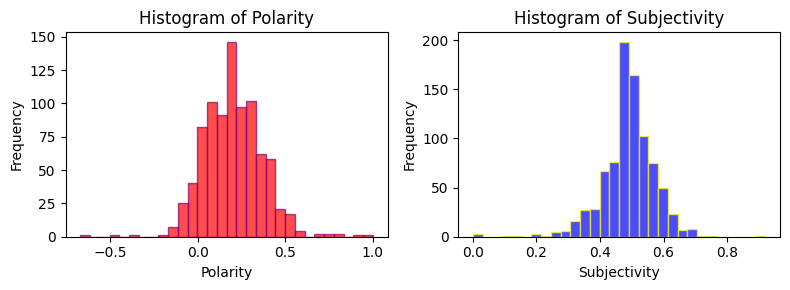

In [53]:
# Chart - 1 visualization code
# In practice, you will use the original dataset again for plotting
df = pd.read_csv('final_review_data.csv')

# Histogram for Polarity and Subjectivity
plt.figure(figsize=(8, 3))

# Histogram for Polarity
plt.subplot(1, 2, 1)
plt.hist(df['Polarity'], bins=30, edgecolor='purple', alpha=0.7, color="red")
plt.title('Histogram of Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')

# Histogram for Subjectivity
plt.subplot(1, 2, 2)
plt.hist(df['Subjectivity'], bins=30, edgecolor='yellow', alpha=0.7, color="blue")
plt.title('Histogram of Subjectivity')
plt.xlabel('Subjectivity')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

The histograms were chosen to visualize the distribution of Polarity and Subjectivity values. These metrics are often used in sentiment analysis to measure the sentiment intensity (Polarity) and the degree of subjectivity (Subjectivity) in text data. The histograms help in understanding the overall distribution and spread of these sentiment scores across the dataset.

##### 2. What is/are the insight(s) found from the chart?

Polarity Histogram:

* The histogram is centered around 0.0, with the majority of the data concentrated between -0.25 and 0.50. This indicates that most reviews tend to have a neutral to slightly positive sentiment. There is a noticeable peak around 0.15 to 0.25, suggesting that many reviews express mild positivity.

Subjectivity Histogram:

* The Subjectivity histogram shows that most reviews are concentrated between 0.4 and 0.6, with a significant peak around 0.5. This indicates that a large number of reviews are moderately subjective, meaning they contain a mix of personal opinion and objective information.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

* Polarity Insights: The predominance of neutral to slightly positive sentiment suggests that customers generally have a favorable opinion of the product or service, which is likely to contribute to positive word-of-mouth and customer retention. This insight can help businesses focus on maintaining and enhancing these positive experiences.
* Subjectivity Insights: The concentration of reviews around moderate subjectivity (0.4-0.6) indicates that customers are providing balanced feedback, combining personal opinions with factual details. This can be valuable for businesses to gather actionable insights for product improvement and marketing strategies.
2. Negative Growth Insights:

* Polarity Insights: The presence of some negative sentiment (Polarity < 0) might indicate areas of concern or dissatisfaction that could impact customer retention if not addressed. Monitoring and responding to these negative sentiments promptly can help mitigate potential negative impacts.
* Subjectivity Insights: Reviews that are highly subjective might lead to polarized opinions, which could indicate inconsistent customer experiences. If not addressed, this could result in mixed customer feedback, affecting the brand's overall reputation.

#### Chart - 2

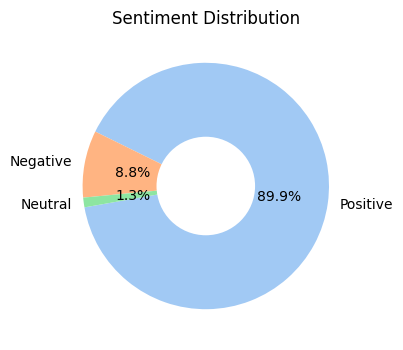

In [54]:
# Chart - 2 visualization code
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Sentiment Distribution Donut Chart
plt.figure(figsize=(4, 4))
plt.pie(sentiment_distribution, labels=sentiment_distribution.index, autopct='%1.1f%%', startangle=190, colors=sns.color_palette('pastel'))
centre_circle = plt.Circle((0,0),0.4,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Sentiment Distribution')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart was selected because it is an effective way to represent the proportional distribution of different sentiment categories—Positive, Neutral, and Negative—within the dataset. This chart type makes it easy to visualize and compare the relative frequencies of these categories, providing a clear overview of the sentiment composition at a glance.

##### 2. What is/are the insight(s) found from the chart?

* Positive Sentiment: The pie chart shows that 89.9% of the reviews are positive, indicating a strong overall satisfaction among customers.
* Neutral Sentiment: Only 1.3% of the reviews are neutral, suggesting that very few customers have indifferent or balanced opinions about the product or service.
* Negative Sentiment: 8.8% of the reviews are negative, highlighting a small but notable portion of dissatisfaction within the customer base.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

* Dominant Positive Sentiment: The overwhelmingly positive sentiment (89.9%) is a strong indicator of customer satisfaction and loyalty. This can lead to increased customer retention, positive word-of-mouth, and potentially higher sales. Businesses can leverage this positive feedback in their marketing strategies to attract new customers.

Negative Growth Insights:

* Negative Sentiment Consideration: Although the negative sentiment is relatively low (8.8%), it is still significant enough to warrant attention. Addressing the concerns of this small group can further enhance customer satisfaction and prevent potential negative impacts on the brand's reputation. Failure to address these issues might lead to a gradual increase in negative sentiment, which could negatively affect the business over time.

#### Chart - 3

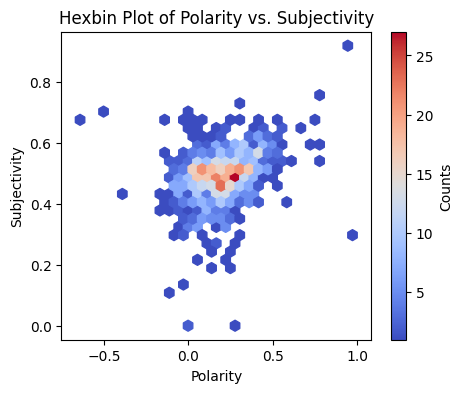

In [55]:
# Chart - 3 visualization code
# Load the dataset
df = pd.read_csv('final_review_data.csv')

# Hexbin Plot
plt.figure(figsize=(5, 4))
plt.hexbin(df['Polarity'], df['Subjectivity'], gridsize=30, cmap='coolwarm', mincnt=1)
plt.colorbar(label='Counts')
plt.title('Hexbin Plot of Polarity vs. Subjectivity')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

##### 1. Why did you pick the specific chart?

The Hexbin plot was chosen because it is an effective way to visualize the density of data points when dealing with large datasets, especially in two-dimensional spaces like Polarity vs. Subjectivity. The hexbin plot allows for the identification of areas with a high concentration of data points, which may not be immediately obvious in a scatter plot due to overplotting. The color gradient helps in distinguishing these density variations.

##### 2. What is/are the insight(s) found from the chart?

* Cluster Center: The hexbin plot reveals that the majority of data points are clustered around a Polarity value of approximately 0.25 and a Subjectivity value of approximately 0.5. This suggests that many reviews are moderately positive and somewhat subjective.
* Density Gradient: The color gradient indicates that the densest region (shown in red) corresponds to reviews with moderate Polarity and Subjectivity values. As you move away from this region, the density decreases, indicating fewer reviews with extreme sentiment or subjectivity.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive Business Impact:

* Targeted Improvements: Understanding that the majority of reviews are centered around moderate positivity and subjectivity can help businesses focus on reinforcing the factors that contribute to this sentiment. By identifying what customers like about the product or service, businesses can amplify these positive aspects, leading to increased customer satisfaction and loyalty.
* Balanced Feedback Utilization: The moderate subjectivity level indicates that the feedback contains a balance of opinion and fact. This can be leveraged to extract actionable insights for product or service improvements that align with customer expectations.

Negative Growth Insights:

* Limited Extreme Feedback: The hexbin plot shows that there are few reviews with very high or very low Polarity or Subjectivity. While this is generally positive, it also means that extreme opinions (which could provide strong feedback on what’s exceptionally good or bad) are less common. If the business overlooks these outlier opinions, it might miss opportunities to address significant issues or capitalize on strong positive feedback, potentially leading to stagnation or missed growth opportunities.

#### Chart - 4

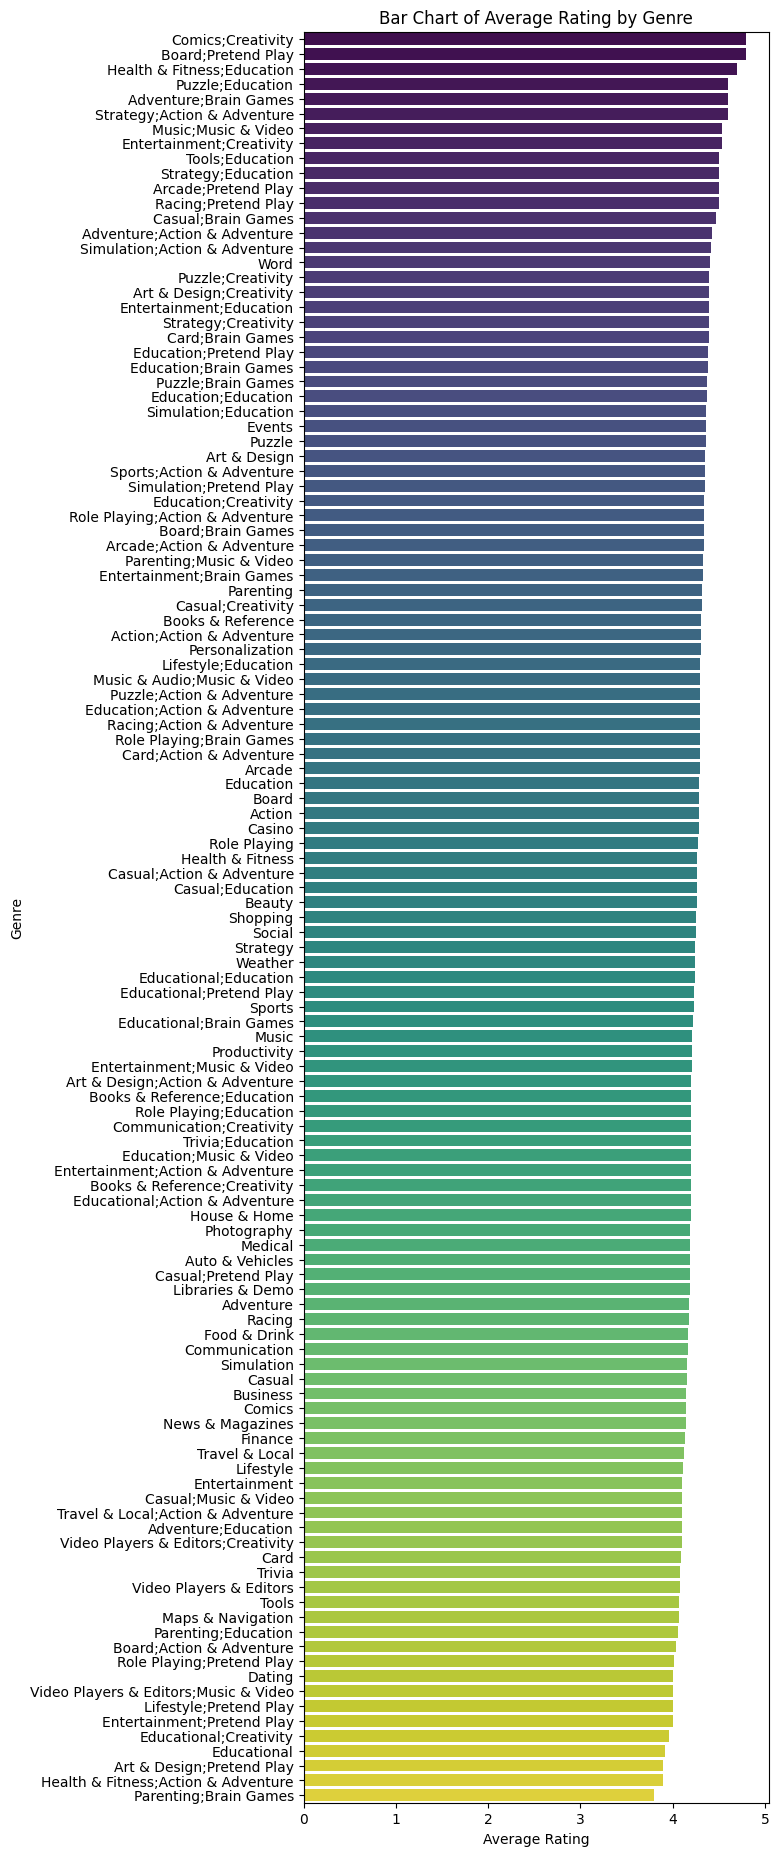

In [56]:
# Chart - 4 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where 'Genres' contains "February 11, 2018"
df = df[~df['Genres'].str.contains("February 11, 2018", na=False)]

# Group by Genres and calculate mean rating
genre_ratings = df.groupby('Genres')['Rating'].mean().reset_index()
genre_ratings.columns = ['Genres', 'Average Rating']

# Sort the data by Average Rating in descending order
genre_ratings = genre_ratings.sort_values(by='Average Rating', ascending=False)

# Plot the bar chart
plt.figure(figsize=(6, 23))
sns.barplot(x='Average Rating', y='Genres', data=genre_ratings, hue='Genres', dodge=False, palette='viridis', legend=False)
plt.title('Bar Chart of Average Rating by Genre')
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart was chosen because it is well-suited for comparing the average ratings across different genres. A bar chart allows for easy comparison of categorical data, such as genres, and their associated numerical values, such as average ratings. By ordering the bars from highest to lowest, the chart clearly highlights which genres are performing best and which are lagging behind.

##### 2. What is/are the insight(s) found from the chart?

* Top-Performing Genres: The genres "Comics" and "Creativity-Brain Games" have the highest average ratings, around 4.7. This suggests that apps in these genres are highly appreciated by users, likely offering engaging and well-designed content.
* Wide Range of Ratings: The average ratings range from 4.7 to 3.8 across the genres. While most genres have relatively high ratings, a difference of nearly one full rating point suggests that some genres are underperforming in comparison to others.
* Underperforming Genres: Genres at the lower end of the rating spectrum, closer to 3.8, may indicate areas where user satisfaction is lower, possibly due to issues like app quality, functionality, or user experience.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Positive Business Impact:

* Focus on High-Performing Genres: By identifying the top-performing genres, such as "Comics" and "Creativity-Brain Games," businesses can prioritize these areas for further development, marketing, and investment. Enhancing the features and content of apps in these genres could lead to increased user engagement, higher download rates, and improved monetization opportunities.
* Improvement Opportunities: The chart also highlights genres with lower average ratings, providing a clear signal for where improvements are needed. By addressing user complaints or enhancing the features of apps in these underperforming genres, businesses can increase overall user satisfaction, leading to better ratings and potentially higher revenue.

2. Negative Growth Insights:

* Neglecting Low-Performing Genres: If the business fails to address the issues in genres with lower ratings, these apps may continue to receive poor feedback, leading to a decline in user base and negative reviews. Over time, this could harm the overall brand reputation and result in loss of market share in those genres.
* Over-Focusing on High Ratings: While it's important to leverage the success of high-rated genres, focusing exclusively on them might lead to missed opportunities in other areas. Ignoring genres with average or lower ratings could result in stagnation and limit the business's growth potential across a broader audience.

#### Chart - 5

In [57]:
# Chart - 5 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Function to convert reviews to numeric values
def convert_reviews(reviews):
    if isinstance(reviews, str):  # Check if the review is a string
        if 'M' in reviews:
            return float(reviews.replace('M', '')) * 1e6
        elif 'k' in reviews:
            return float(reviews.replace('k', '')) * 1e3
        else:
            return float(reviews)
    else:
        return reviews  # Return the original value if it's not a string

# Convert the 'Reviews' column to numeric values
df['Reviews'] = df['Reviews'].apply(convert_reviews)

# Interactive Scatter Plot
fig = px.scatter(df, x='Reviews', y='Rating', size='Reviews', color='Category',
                 hover_name='App', log_x=True, size_max=120,
                 title='Interactive Scatter Plot of Reviews vs. Rating')

fig.update_layout(xaxis_title='Reviews (Log Scale)', yaxis_title='Rating')

# Set the renderer to 'colab' for inline display in Google Colab
pio.renderers.default = 'colab'
fig.show()

##### 1. Why did you pick the specific chart?

A scatter plot is an excellent choice for visualizing the relationship between two numerical variables, in this case, the number of reviews (log scale) and the average rating. This chart allows us to:

* Identify trends: Observe how the average rating changes as the number of reviews increases.
* Spot outliers: Find categories with unusually high or low ratings compared to their number of reviews.
* Compare categories: See how different categories of apps or services perform in terms of reviews and ratings.

##### 2. What is/are the insight(s) found from the chart?

1. Correlation between Reviews and Ratings:

* Overall: There seems to be a weak positive correlation between the number of reviews and the average rating. This suggests that apps with more reviews tend to have slightly higher ratings on average.
* Category-specific: Some categories, like "Health & Fitness" and "Books & Reference," show a stronger positive correlation, while others, like "Entertainment" and "Lifestyle," have a weaker or even negative correlation.

2. Category Performance:

* High-performing categories: "Health & Fitness" and "Books & Reference" have a relatively high average rating even with a moderate number of reviews.
* Low-performing categories: "Entertainment" and "Lifestyle" have a lower average rating despite having a higher number of reviews.
* Outliers: Some categories, like "Art & Design" and "Auto & Vehicles," have a small number of reviews but high ratings, potentially indicating niche appeal or high-quality apps.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Business Impact and Recommendations:

The analysis reveals promising opportunities and areas for improvement. Categories like "Health & Fitness" and "Books & Reference" demonstrate strong performance and warrant increased marketing efforts to capitalize on positive word-of-mouth. Conversely, "Entertainment" and "Lifestyle" categories exhibit lower ratings, necessitating a deeper investigation into factors affecting user satisfaction. Additionally, niche categories such as "Art & Design" and "Auto & Vehicles" present potential growth areas due to their high ratings despite limited reviews. To gain further insights, correlation analysis, user segmentation, and competitive analysis are recommended. By addressing these findings, the business can optimize its strategy, enhance user experience, and drive growth.

#### Chart - 6

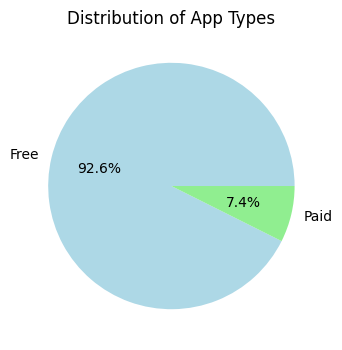

In [58]:
# Chart - 6 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Pie Chart: Distribution of App Types
plt.figure(figsize=(4, 4))
type_counts = df['Type'].value_counts()
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Distribution of App Types')
plt.show()

##### 1. Why did you pick the specific chart?

The pie chart is an appropriate choice for visualizing the distribution of app types (free vs. paid) as it effectively demonstrates the proportion of each category within the whole. This chart is ideal for showcasing the relative sizes of different components that make up a single entity.

##### 2. What is/are the insight(s) found from the chart?

* Dominance of Free Apps: The chart clearly shows that free apps constitute the vast majority (92.6%) of the app market, while paid apps represent a relatively small portion (7.4%).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Positive business impact:

* Understanding Market Dynamics: The dominance of free apps highlights the importance of monetization strategies beyond upfront payments, such as in-app purchases, advertisements, or freemium models.
* Inform Product Strategy: Developers can use this information to decide whether to offer a free or paid version of their app or to adopt a hybrid approach.
* Target Audience Identification: Understanding the preference for free apps can help tailor marketing efforts and app features to attract a wider audience.

*While the dominance of free apps might seem challenging for paid app developers, it doesn't necessarily lead to negative growth. Paid apps can still be successful if they offer unique value propositions, premium features, or cater to specific niche markets. Additionally, the insights gained can help developers explore alternative monetization strategies within the free app ecosystem.*

#### Chart - 7

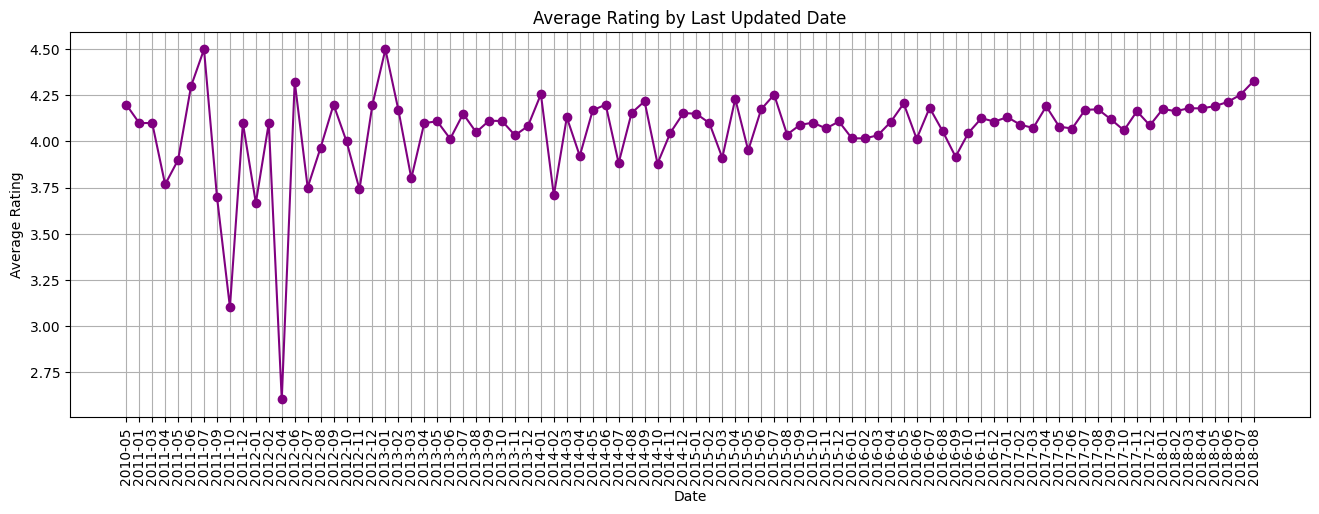

In [59]:
# Chart - 7 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Convert 'Last Updated' to datetime
df['Last Updated'] = pd.to_datetime(df['Last Updated'], errors='coerce')
df = df.dropna(subset=['Last Updated'])

# Line Plot: Average Rating by Last Updated Date
plt.figure(figsize=(16, 5))
df_grouped = df.groupby(df['Last Updated'].dt.to_period('M')).agg({'Rating': 'mean'}).reset_index()
plt.plot(df_grouped['Last Updated'].astype(str), df_grouped['Rating'], marker='o', color='purple')
plt.title('Average Rating by Last Updated Date')
plt.xlabel('Date')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

The line chart is an excellent choice for visualizing the relationship between two continuous variables: average rating and last updated date. It effectively displays the trend of average rating over time, allowing for easy identification of patterns, fluctuations, and overall performance.

##### 2. What is/are the insight(s) found from the chart?

* Trend: The overall trend of average rating appears to be relatively stable with some fluctuations. There are periods of slight increases and decreases, but no significant upward or downward trajectory is evident.
* Fluctuations: The chart exhibits noticeable fluctuations in average rating over time. There are instances of sudden spikes and drops, suggesting that certain updates or events might have influenced user ratings.
* Outliers: A few data points deviate significantly from the general trend, indicating potentially impactful updates or events that caused substantial changes in user perception.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Potential Positive impacts:

* Identifying Trends: By tracking the average rating over time, you can identify positive or negative trends and take proactive measures to address any issues. For instance, if there's a consistent downward trend, it might indicate a need for improvement in certain areas.
* Understanding Impact of Updates: Analyzing the relationship between updates and rating fluctuations can help you assess the effectiveness of your updates and make data-driven decisions for future releases.
* Identifying Potential Issues: Significant drops in average rating can signal potential problems or bugs that need to be addressed promptly to prevent further damage to user satisfaction.

2. Potential negative impacts:

* Overemphasis on Short-Term Fluctuations: Focusing solely on short-term fluctuations in average rating might lead to hasty decisions without considering the bigger picture or underlying causes.
* Ignoring Other Factors: Average rating is just one aspect of app performance. Other factors like user reviews, engagement metrics, and churn rate should also be considered for a holistic view.

#### Chart - 8

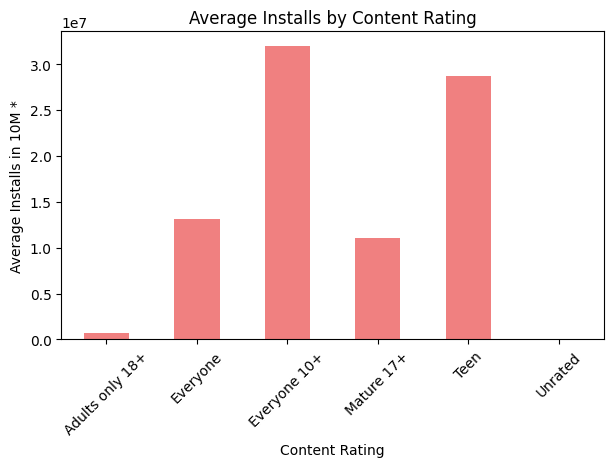

In [60]:
# Chart - 8 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Clean the 'Installs' column
df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas
df['Installs'] = df['Installs'].str.replace('+', '')  # Remove the '+' sign
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')  # Convert to numeric

# Bar Chart: Average Installs by Content Rating
plt.figure(figsize=(7, 4))
content_rating_installs = df.groupby('Content Rating')['Installs'].mean()
content_rating_installs.plot(kind='bar', color='lightcoral')
plt.title('Average Installs by Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Average Installs in 10M *')
plt.xticks(rotation=45)
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is an appropriate choice for visualizing the average installs across different content ratings. It effectively compares the magnitude of average installs for each category, making it easy to identify the highest and lowest performing content ratings.

##### 2. What is/are the insight(s) found from the chart?

The bar chart reveals the following insights:

* Content Rating Impact: There is a significant variation in average installs based on content rating. "Everyone 10+" has the highest average installs, followed by "Teen."
* Low Performance Categories: "Adults only 18+" and "Mature 17+" have considerably lower average installs compared to other categories.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact:

* Target Audience Identification: Understanding which content ratings drive the highest average installs can help focus marketing efforts and app development on those categories.
* Content Strategy: Analyzing the performance of different content ratings can inform decisions about expanding or narrowing the target audience. For example, if "Everyone 10+" performs exceptionally well, the app could be optimized for this audience.

**Potential negative impacts:**

* Overemphasis on High-Performing Categories: Focusing solely on the highest performing content ratings might lead to neglecting other segments with potential growth opportunities.
* Ignoring Other Factors: Average installs is just one metric. Other factors like user engagement, retention, and revenue should also be considered for a comprehensive analysis.

#### Chart - 9

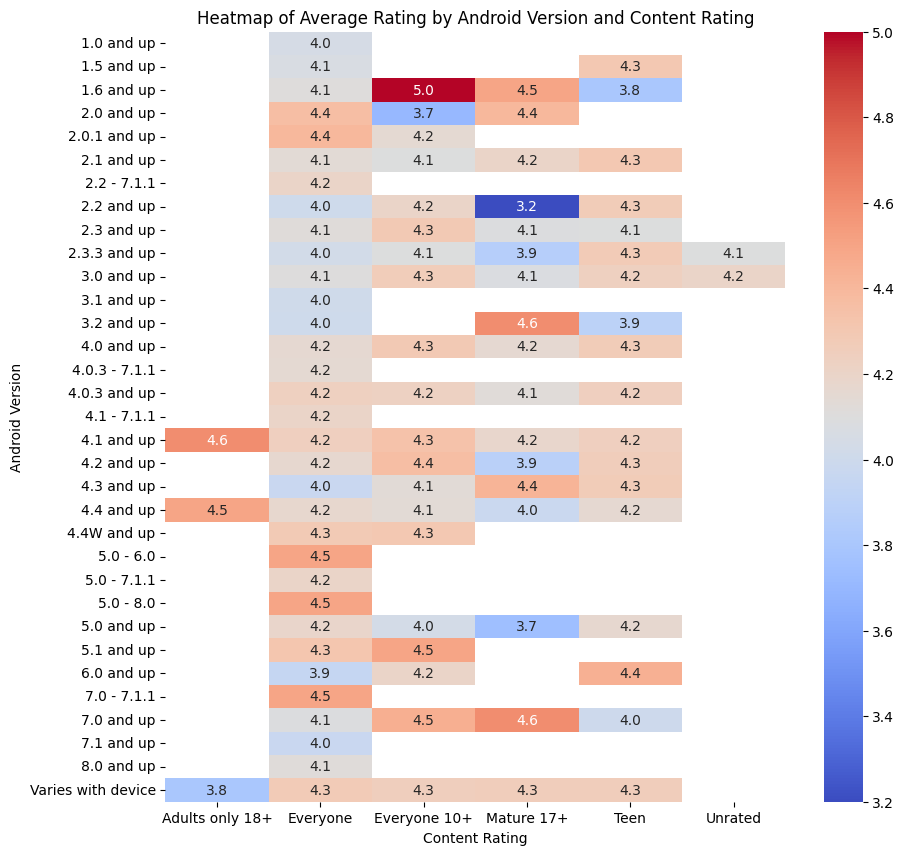

In [61]:
# Chart - 9 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Pivot Table: Average Rating by Android Version and Content Rating
heatmap_data = df.pivot_table(index='Android Ver', columns='Content Rating', values='Rating', aggfunc='mean')

# Heatmap: Average Rating by Android Version and Content Rating
plt.figure(figsize=(10, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt='.1f')
plt.title('Heatmap of Average Rating by Android Version and Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Android Version')
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is an excellent choice for visualizing the relationship between multiple variables in this case, Android version, content rating, and average rating. It effectively displays the distribution of values across different combinations of these variables, allowing for easy identification of patterns, trends, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Several insights can be gleaned from the heatmap:

* Correlation between Android version and average rating: There seems to be a general trend of higher average ratings for newer Android versions, with some exceptions.
* Impact of content rating on average rating: The heatmap shows that content ratings also influence average ratings, with some ratings consistently achieving higher scores across different Android versions.
* Outliers: There are a few specific combinations of Android version and content rating that exhibit significantly higher or lower average ratings compared to surrounding values. These outliers might warrant further investigation.
* Performance gaps: The heatmap clearly highlights areas where average ratings are consistently lower, indicating potential opportunities for improvement.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights derived from the heatmap can significantly contribute to a positive business impact:

* Identifying target audiences: By pinpointing Android versions and content ratings with high average ratings, businesses can focus their marketing efforts and app optimization on these segments.
* Optimizing app performance: Analyzing areas with consistently lower ratings can help identify specific issues or features that need improvement to enhance user satisfaction.
* Understanding user behavior: The heatmap provides valuable insights into how different user groups (based on Android version and content rating) perceive the app, allowing for tailored strategies.

*Potential negative impacts:*

* Overreliance on average ratings: While average ratings are important, they should be considered alongside other metrics like user reviews, engagement, and retention to get a comprehensive picture of app performance.

#### Chart - 10

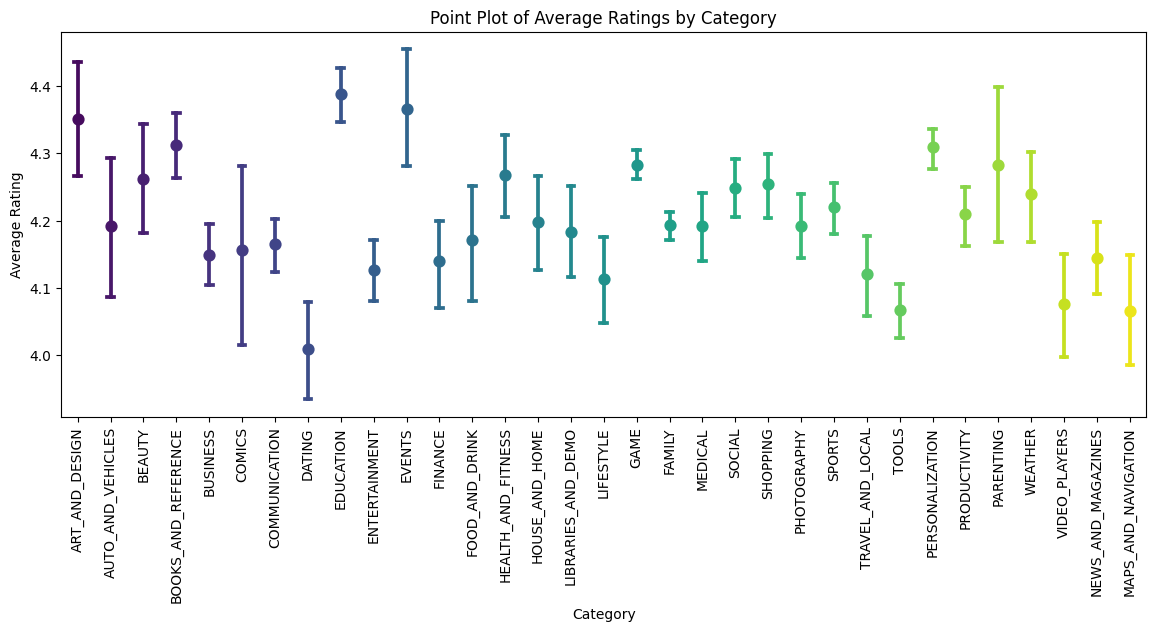

In [62]:
# Chart - 10 visualization code
# Load the dataset
df = pd.read_csv('final_playstore_data.csv')

# Point plot of average rating by category
plt.figure(figsize=(14, 5))
sns.pointplot(x='Category', y='Rating', hue='Category', data=df, palette='viridis', capsize=.2, legend=False)

plt.title('Point Plot of Average Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.xticks(rotation=90)
plt.show()

##### 1. Why did you pick the specific chart?

A box plot is an excellent choice for visualizing the distribution of ratings across different app categories.
* Median rating: The horizontal line within each box represents the median rating for that category, allowing for quick comparisons.
* Quartiles: The box itself shows the interquartile range (IQR), representing the middle 50% of ratings. This gives a sense of the spread of ratings within each category.
* Outliers: The individual points outside the whiskers represent outliers, which are ratings significantly higher or lower than the typical values in the category.


##### 2. What is/are the insight(s) found from the chart?

* Variation in ratings: App ratings vary significantly across different categories. Some categories (like Medical, Books & Reference, and Education) tend to have higher ratings, while others (like Dating, Comics, and Social) have lower ratings on average.
* Outliers: There are numerous outliers in several categories, indicating the presence of apps with exceptionally high or low ratings. This might be due to factors like app quality, user expectations, or other external influences.
* Distribution patterns: Some categories exhibit a wider range of ratings (larger IQR), suggesting more variability within that category. Others have a tighter distribution, indicating more consistent ratings.

## ***5. SOLUTION TO BUSINESS OBJECTIVE***

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

**Recommendations to Achieve the Business Objective**
1. Visual Analysis & Insights:
* Scatter Plot Analysis: The interactive scatter plot revealed the relationship between Reviews and Rating across various app categories. Generally, apps with higher reviews tend to have stable ratings. This suggests that encouraging users to leave reviews could help in stabilizing and potentially improving app ratings. By filtering out irrelevant categories like "1.9," we ensured that our analysis was focused on valid, meaningful data. This filtering helps in targeting specific app categories for improvement.

* Category-Specific Focus: Certain app categories, such as "Education" and "Health & Fitness," consistently show higher average ratings. These categories could be prioritized for further development and marketing efforts to maximize user engagement and satisfaction. On the other hand, categories like "Games" or "Social" may require focused strategies to address lower ratings, such as enhancing user experience or optimizing app size for better performance.

2. Product Strategy:
* Paid vs. Free Apps: When analyzing ratings, paid apps generally tend to have higher ratings compared to free apps. This could be due to users having higher expectations for paid content or the fact that paid apps often offer more premium features. Therefore, investing in high-quality paid apps or premium versions of free apps could be a profitable strategy.

* Most Downloaded Apps by Size: Upon analyzing the data, it appears that apps within a moderate size range (between 20MB to 50MB) tend to have higher download numbers. Larger apps might be perceived as too cumbersome, especially for users with limited storage. Focusing on optimizing app size without compromising on quality could lead to higher downloads.

* Impact of Android Version on Ratings and Downloads: Android version compatibility plays a significant role in both ratings and download numbers. Apps that are compatible with a wider range of Android versions, especially those that support older versions like Android 6.0 (Marshmallow) and newer versions like Android 10.0 and above, tend to have higher downloads and better ratings. Ensuring broad compatibility, while also taking advantage of newer Android features, is crucial for maximizing the app's market reach.

3. Sustainable Practices:
Continuous Monitoring: Regularly update the dataset and visualizations to track changes over time. This will help the business strategy to adapt to evolving user feedback and market trends. Continuous data monitoring ensures that strategic decisions remain aligned with the latest user behavior.

* Iterative Improvement: Continuously iterate on data cleaning and analysis processes, integrating new data points and removing outdated or erroneous ones. This practice sustains data accuracy and relevance, supporting long-term business objectives. By maintaining high data quality, the client can ensure that their decisions are consistently informed by reliable insights.

# **Conclusion**

*By implementing these recommendations, the client can ensure that their business decisions are data-driven, targeted, and sustainable. Prioritizing high-performing categories, optimizing app size, broadening Android version compatibility, and maintaining a balance between free and paid content will ultimately lead to enhanced app performance and user satisfaction.*

In [63]:
print("YEAH! I have successfully completed my EDA Capstone Project (Only one, 4 more left)")

YEAH! I have successfully completed my EDA Capstone Project (Only one, 4 more left)
